Dependencies

In [ ]:
from typing import Tuple

from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

Constant values

In [ ]:
Q_OUTLIERS = 50
Q_DATAPOINTS = 200

Auxiliary functions

In [ ]:
def count_anomalies(li: np.ndarray) -> int:
    return sum(map(lambda x : x == -1, li))

In [ ]:
def create_dataset(q_train: int, q_out: int) -> Tuple[np.ndarray, np.ndarray]:
    X = 0.3 * np.random.randn(q_train, 2)
    X_norm = np.r_[X + 2, X - 2]

    X_outliers = np.random.uniform(low=-4, high=4, size=(q_out, 2))

    return X_norm, X_outliers

In [ ]:
def correlate_indexes(pred_arr: np.ndarray, original_arr: np.ndarray) -> np.ndarray:
    # Get outliers' index
    anom_index = np.where(pred_arr == -1)

    # Rerturn outliers' exact position from base set by correlating indexes
    return original_arr[anom_index]

In [ ]:
def metrics_gen(orig_outliers: np.ndarray, predicted_outliers: np.ndarray,
                correct_outliers: np.ndarray, false_outliers: np.ndarray,
                undetected_outliers: np.ndarray):
    print('Accuracy on test set: {:.2f}%'.format(100 * len(correct_outliers) / len(X_test_outliers)))
    print('False detection ratio: {:.2f}%'.format(100 * len(false_outliers) / len(test_anom)))
    print('Undetection ratio: {:.2f}%'.format(100 * len(undetected_outliers) / len(X_test_outliers)))

Training set

In [ ]:
X_train = create_dataset(Q_DATAPOINTS, Q_OUTLIERS)
X_train_normal = X_train[0]
X_train_outliers = X_train[1]

# Merge outliers into the normally distributed sub-set
X_train = np.append(X_train_normal, X_train_outliers, axis=0)

Test set

In [ ]:
X_test = create_dataset(Q_DATAPOINTS, Q_OUTLIERS)
X_test_normal = X_test[0]
X_test_outliers = X_test[1]

# Merge outliers into the normally distributed sub-set
X_test = np.append(X_test_normal, X_test_outliers, axis=0)

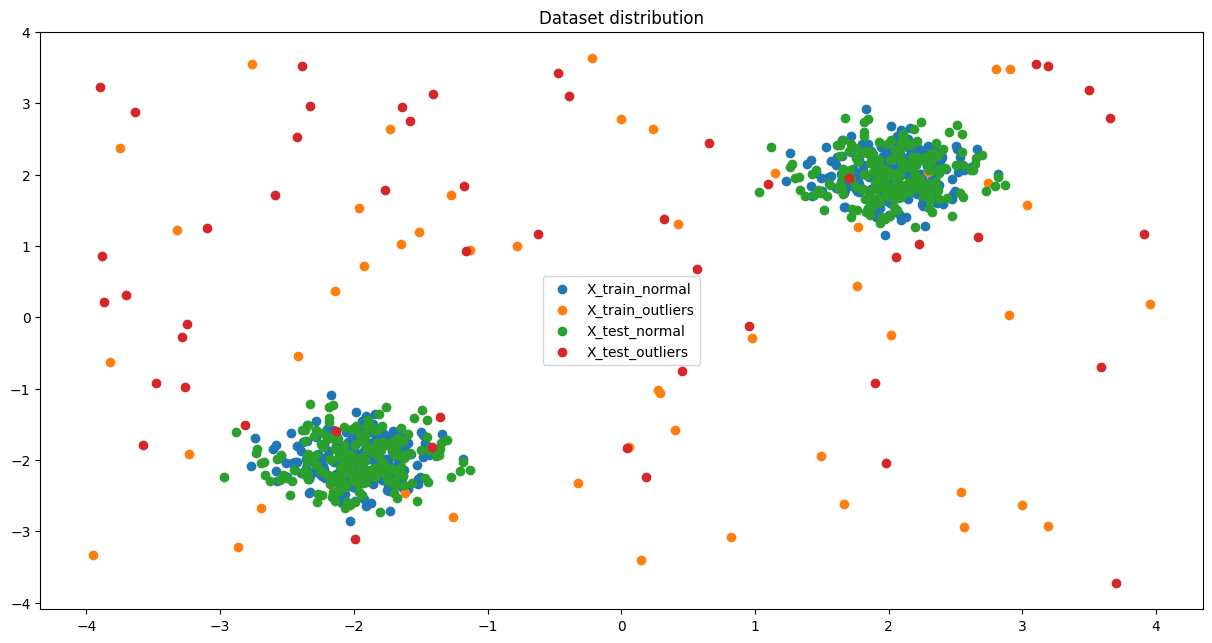

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title("Dataset distribution")

plt.scatter(X_train_normal[:, 0], X_train_normal[:, 1], label='X_train_normal')
plt.scatter(X_train_outliers[:, 0], X_train_outliers[:, 1], label='X_train_outliers')
plt.scatter(X_test_normal[:, 0], X_test_normal[:, 1], label='X_test_normal')
plt.scatter(X_test_outliers[:, 0], X_test_outliers[:, 1], label='X_test_outliers')
plt.legend()
plt.show()

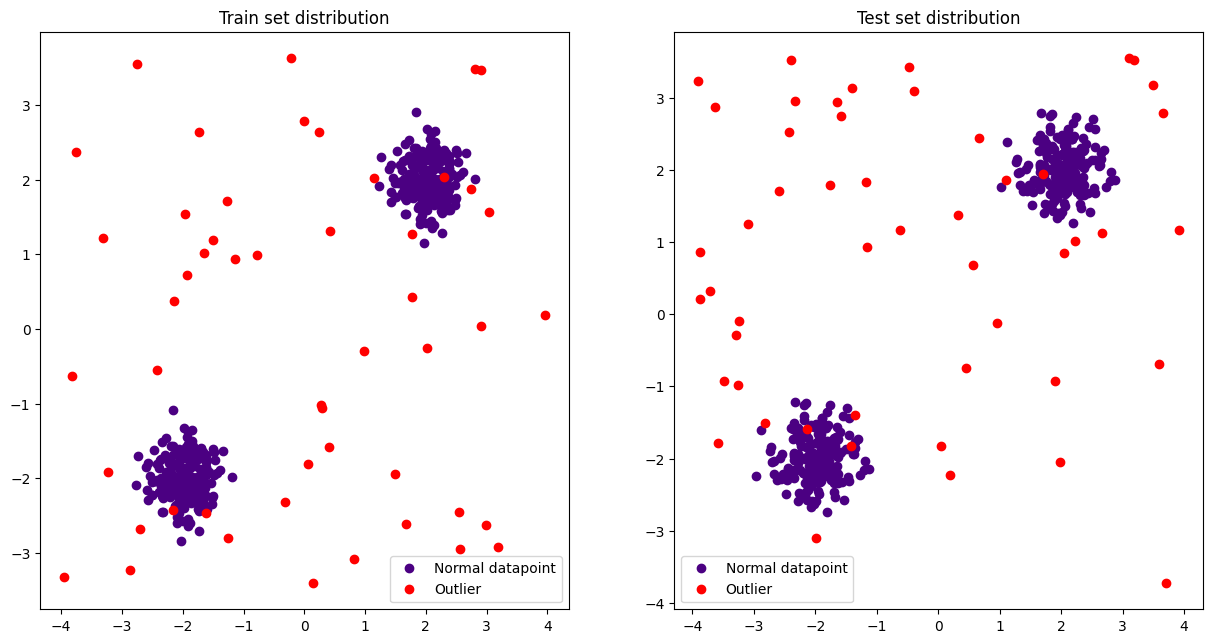

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7.5))

# Plot train set
ax1.set_title('Train set distribution')
ax1.scatter(X_train_normal[:, 0], X_train_normal[:, 1], color='indigo')
ax1.scatter(X_train_outliers[:, 0], X_train_outliers[:, 1], color='red')

# Legend for train set
legend_elements = [Line2D([], [], marker='o', label='Normal datapoint', color='indigo', linestyle='None'),
                   Line2D([], [], marker='o', label='Outlier', color='red', linestyle='None')]
ax1.legend(handles=legend_elements)

# Plot test set
ax2.set_title('Test set distribution')
ax2.scatter(X_test_normal[:, 0], X_test_normal[:, 1], color='indigo')
ax2.scatter(X_test_outliers[:, 0], X_test_outliers[:, 1], color='red')

# Legend for test set
legend_elements = [Line2D([], [], marker='o', label='Normal datapoint', color='indigo', linestyle='None'),
                   Line2D([], [], marker='o', label='Outlier', color='red', linestyle='None')]
ax2.legend(handles=legend_elements)
plt.show()

Definition & training

In [ ]:
# Install the latest version of scikit-learn
!pip install -U scikit-learn

# Import the necessary libraries
import numpy as np
from sklearn.ensemble import IsolationForest

# Instantiate the IsolationForest model
# The 'behaviour' parameter has been removed as it is deprecated in later scikit-learn versions
# Instead, the 'contamination' parameter is used to specify the expected proportion of outliers
clf = IsolationForest(random_state=42, contamination=0.1)

# Fit the model to the training data
clf.fit(X_train)

IsolationForest(contamination=0.1, random_state=42)

Run predictions

In [ ]:
y_train = clf.predict(X_train)
y_test = clf.predict(X_test)

In [ ]:
train_anom = correlate_indexes(y_train, X_train)
test_anom = correlate_indexes(y_test, X_test)

Plot

train se

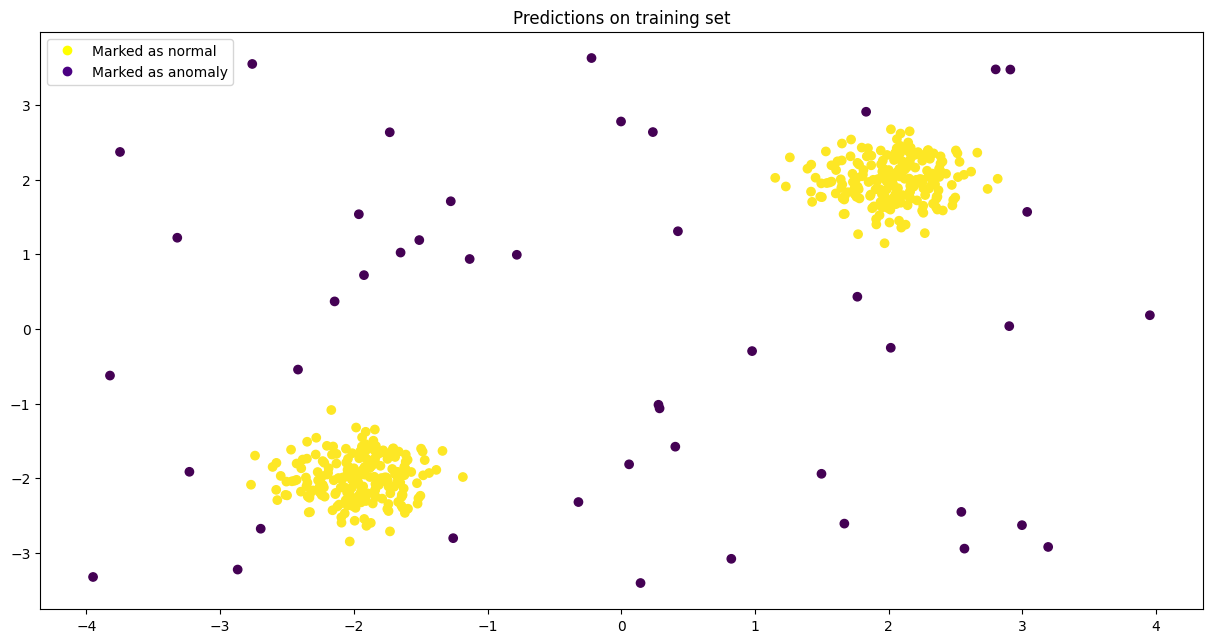

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Predictions on training set')

# This is to set the legend appropriately
legend_elements = [Line2D([], [], marker='o', color='yellow', label='Marked as normal', linestyle='None'),
                   Line2D([], [], marker='o', color='indigo', label='Marked as anomaly', linestyle='None')]
plt.legend(handles=legend_elements)
plt.show()

test set

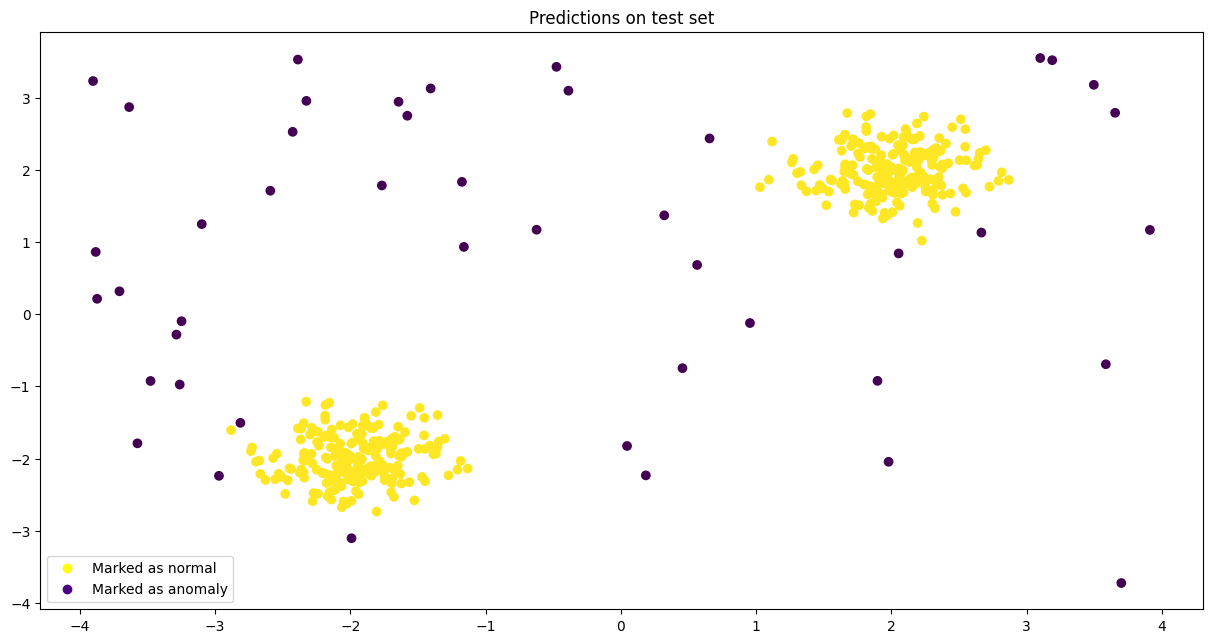

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title('Predictions on test set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

legend_elements = [Line2D([], [], marker='o', color='yellow', label='Marked as normal', linestyle='None'),
                   Line2D([], [], marker='o', color='indigo', label='Marked as anomaly', linestyle='None')]
plt.legend(handles=legend_elements)
plt.show()

Comparative charts
Anomalies
Train set

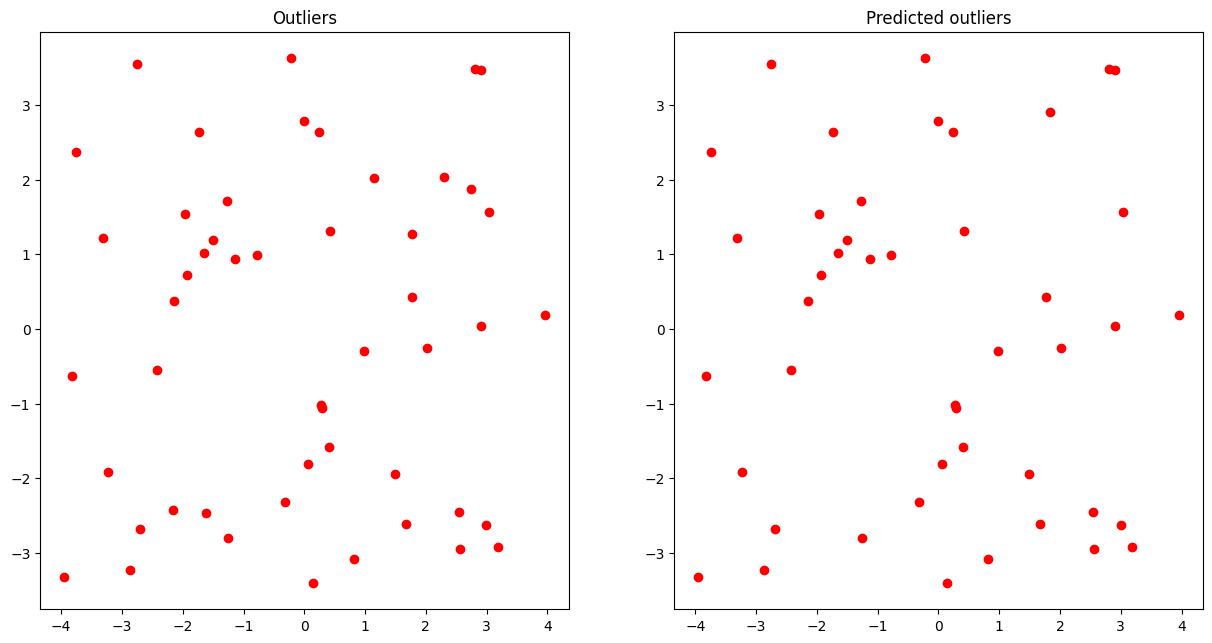

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7.5))

# Plot train set
ax1.set_title('Outliers')
ax1.scatter(X_train_outliers[:, 0], X_train_outliers[:, 1], color='red')

# Plot test set
ax2.set_title('Predicted outliers')
ax2.scatter(train_anom[:, 0], train_anom[:, 1], color='red')
plt.show()

Stats

In [ ]:
false_outliers = np.array([val for val in train_anom if val not in X_train_outliers and val in X_train_normal])
undetected_outliers = np.array([val for val in X_train_outliers if val not in train_anom])

correct_outliers = np.array([val for val in train_anom if val in X_train_outliers])

print('Anomalies in original dataset: {}'.format(X_train_outliers.shape[0]))
print('Predicted anomalies: {}'.format(train_anom.shape[0]))

print('Correct outlier detections: {}'.format(len(correct_outliers)))
print('False outlier detections: {}'.format(len(false_outliers)))
print('Undetected outliers: {}'.format(len(undetected_outliers)))

Anomalies in original dataset: 50
Predicted anomalies: 45
Correct outlier detections: 44
False outlier detections: 1
Undetected outliers: 6


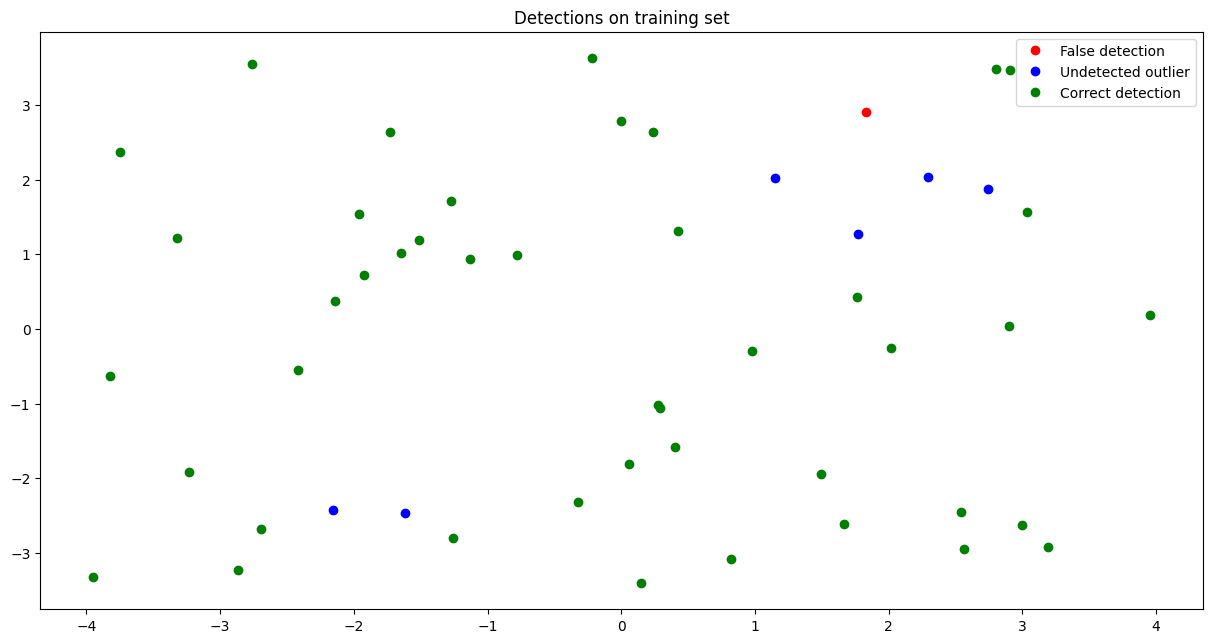

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title('Detections on training set')
plt.scatter(false_outliers[:, 0], false_outliers[:, 1], color='r')
plt.scatter(correct_outliers[:, 0], correct_outliers[:, 1], color='g')
plt.scatter(undetected_outliers[:, 0], undetected_outliers[:, 1], color='b')

legend_elements = [Line2D([], [], marker='o', color='r', label='False detection', linestyle='None'),
                   Line2D([], [], marker='o', color='b', label='Undetected outlier', linestyle='None'),
                   Line2D([], [], marker='o', color='g', label='Correct detection', linestyle='None')]
plt.legend(handles=legend_elements)
plt.show()

Metrics

In [ ]:
metrics_gen(X_train_outliers, train_anom, correct_outliers, false_outliers, undetected_outliers)

Accuracy on test set: 88.00%
False detection ratio: 2.22%
Undetection ratio: 12.00%


Test set

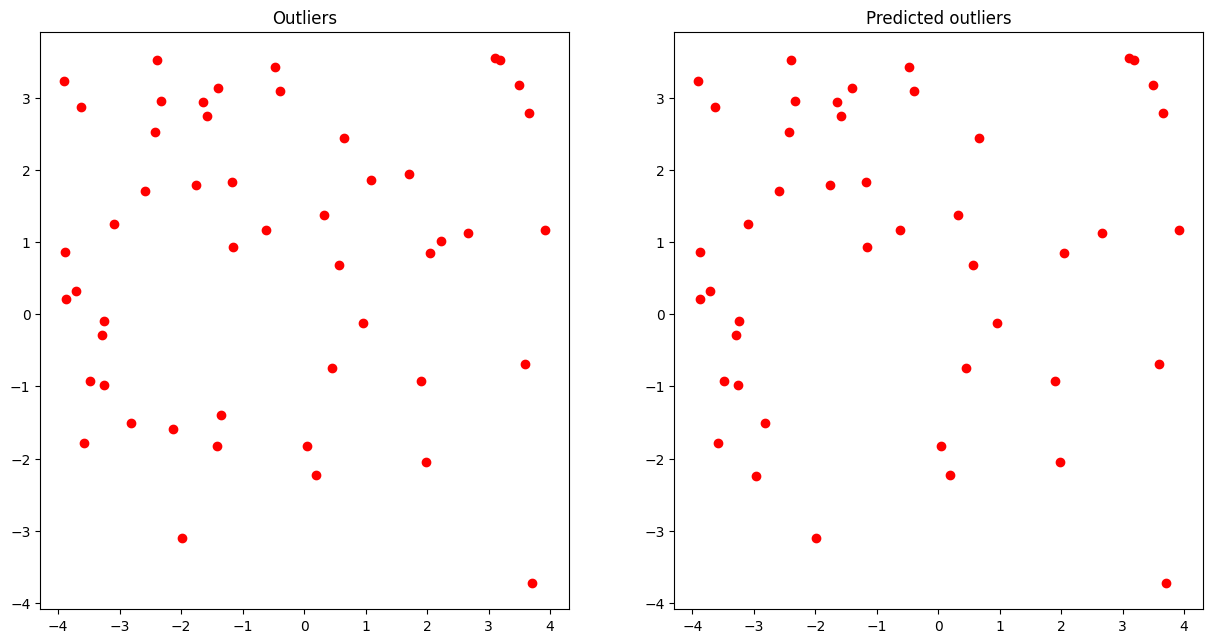

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7.5))

# Plot train set
ax1.set_title('Outliers')
ax1.scatter(X_test_outliers[:, 0], X_test_outliers[:, 1], color='red')

# Plot test set
ax2.set_title('Predicted outliers')
ax2.scatter(test_anom[:, 0], test_anom[:, 1], color='red')
plt.show()

Stats

In [ ]:
false_outliers = np.array([val for val in test_anom if val not in X_test_outliers and val in X_test_normal])
undetected_outliers = np.array([val for val in X_test_outliers if val not in test_anom])

correct_outliers = np.array([val for val in test_anom if val in X_test_outliers])

print('Anomalies in original dataset: {}'.format(X_test_outliers.shape[0]))
print('Predicted anomalies: {}'.format(test_anom.shape[0]))
print('Correct outlier detections: {}'.format(len(correct_outliers)))
print('False outlier detections: {}'.format(len(false_outliers)))
print('Undetected outliers: {}'.format(len(undetected_outliers)))

Anomalies in original dataset: 50
Predicted anomalies: 45
Correct outlier detections: 44
False outlier detections: 1
Undetected outliers: 6


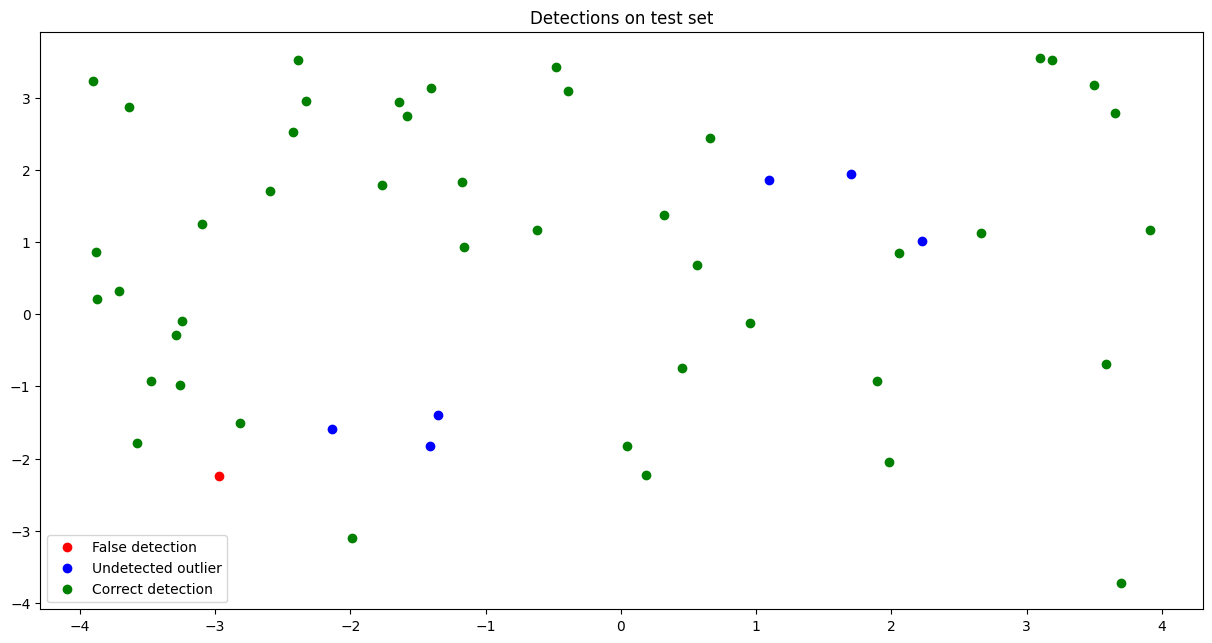

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title('Detections on test set')

if len(false_outliers):
    plt.scatter(false_outliers[:, 0], false_outliers[:, 1], color='r')
plt.scatter(correct_outliers[:, 0], correct_outliers[:, 1], color='g')
plt.scatter(undetected_outliers[:, 0], undetected_outliers[:, 1], color='b')

legend_elements = [Line2D([], [], marker='o', color='r', label='False detection', linestyle='None'),
                   Line2D([], [], marker='o', color='b', label='Undetected outlier', linestyle='None'),
                   Line2D([], [], marker='o', color='g', label='Correct detection', linestyle='None')]
plt.legend(handles=legend_elements)
plt.show()

Metrics

In [ ]:
metrics_gen(X_train_outliers, train_anom, correct_outliers, false_outliers, undetected_outliers)

Accuracy on test set: 88.00%
False detection ratio: 2.22%
Undetection ratio: 12.00%


One Class Support Vector Machine

Definition & training

In [ ]:
svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)
svm.fit(X_train)

OneClassSVM(nu=0.1)

Predictions

In [ ]:
pred = svm.predict(X_train)
pred_test = svm.predict(X_test)

In [ ]:
train_anom = correlate_indexes(pred, X_train)
test_anom = correlate_indexes(pred_test, X_test)

Plots
Train set

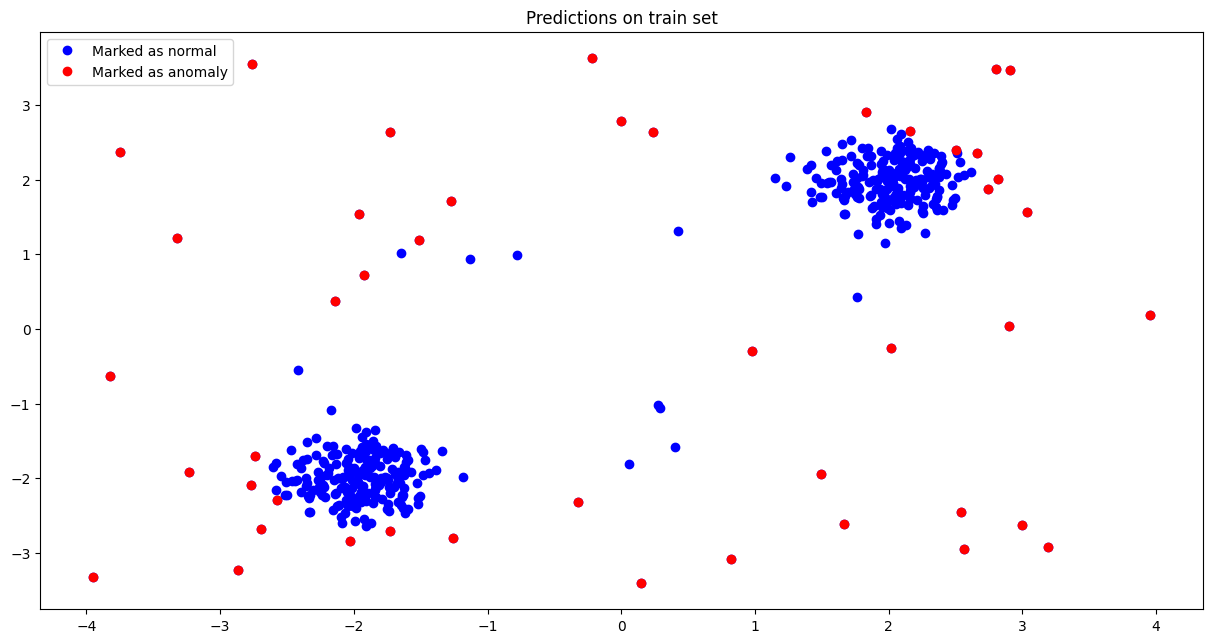

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title('Predictions on train set')
plt.scatter(X_train[:, 0], X_train[:, 1], color='b')
plt.scatter(train_anom[:, 0], train_anom[:, 1], color='r')

legend_elements = [Line2D([], [], marker='o', color='b', label='Marked as normal', linestyle='None'),
                   Line2D([], [], marker='o', color='r', label='Marked as anomaly', linestyle='None')]
plt.legend(handles=legend_elements)
plt.show()

Test set

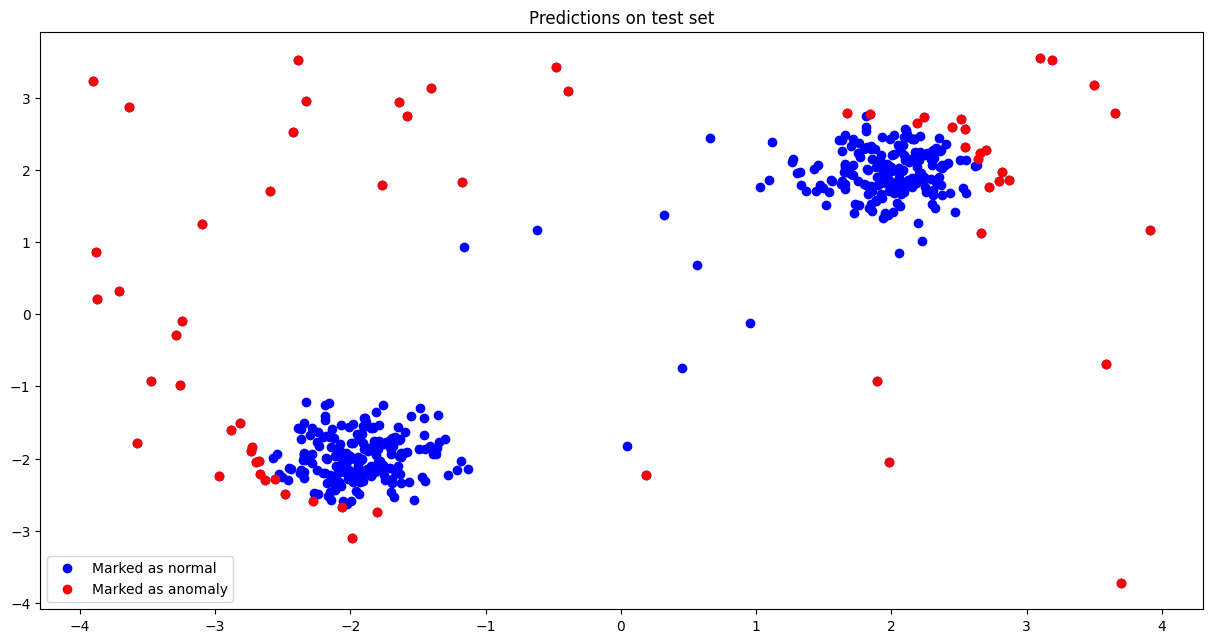

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title('Predictions on test set')
plt.scatter(X_test[:, 0], X_test[:, 1], color='b')
plt.scatter(test_anom[:, 0], test_anom[:, 1], color='r')

legend_elements = [Line2D([], [], marker='o', color='b', label='Marked as normal', linestyle='None'),
                   Line2D([], [], marker='o', color='r', label='Marked as anomaly', linestyle='None')]
plt.legend(handles=legend_elements)
plt.show()

Comparative Charts
Anomalies
Train set

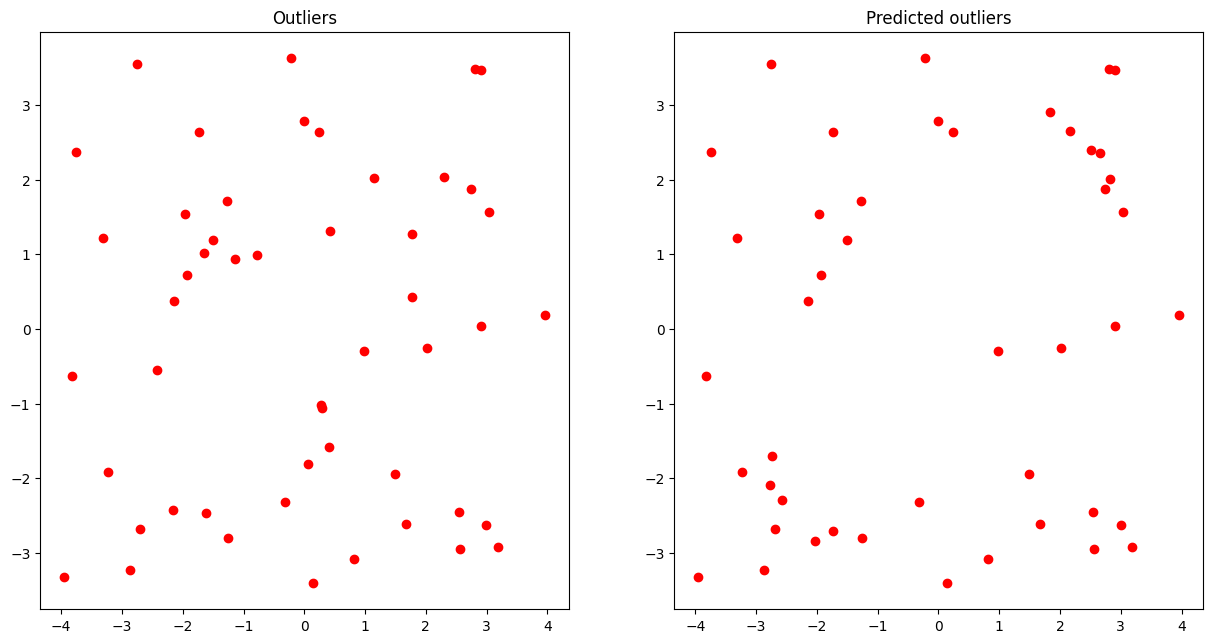

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7.5))

# Plot train set
ax1.set_title('Outliers')
ax1.scatter(X_train_outliers[:, 0], X_train_outliers[:, 1], color='red')

# Plot test set
ax2.set_title('Predicted outliers')
ax2.scatter(train_anom[:, 0], train_anom[:, 1], color='red')
plt.show()

Stats

In [ ]:
false_outliers = np.array([val for val in train_anom if val not in X_train_outliers and val in X_train_normal])
undetected_outliers = np.array([val for val in X_train_outliers if val not in train_anom])

correct_outliers = np.array([val for val in train_anom if val in X_train_outliers])

print('Anomalies in original dataset: {}'.format(X_train_outliers.shape[0]))
print('Predicted anomalies: {}'.format(train_anom.shape[0]))
print('Correct outlier detections: {}'.format(len(correct_outliers)))
print('False outlier detections: {}'.format(len(false_outliers)))
print('Undetected outliers: {}'.format(len(undetected_outliers)))

Anomalies in original dataset: 50
Predicted anomalies: 45
Correct outlier detections: 35
False outlier detections: 10
Undetected outliers: 15


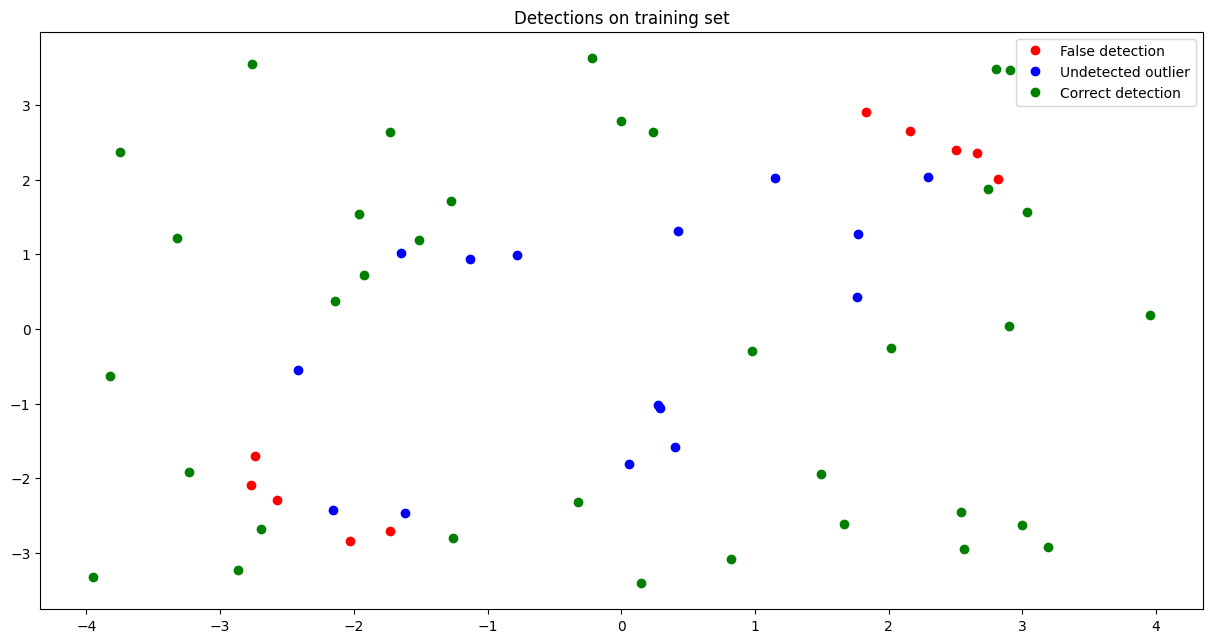

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title('Detections on training set')
plt.scatter(false_outliers[:, 0], false_outliers[:, 1], color='r')
plt.scatter(correct_outliers[:, 0], correct_outliers[:, 1], color='g')
plt.scatter(undetected_outliers[:, 0], undetected_outliers[:, 1], color='b')

legend_elements = [Line2D([], [], marker='o', color='r', label='False detection', linestyle='None'),
                   Line2D([], [], marker='o', color='b', label='Undetected outlier', linestyle='None'),
                   Line2D([], [], marker='o', color='g', label='Correct detection', linestyle='None')]
plt.legend(handles=legend_elements)
plt.show()

In [ ]:
metrics_gen(X_train_outliers, train_anom, correct_outliers, false_outliers, undetected_outliers)

Accuracy on test set: 70.00%
False detection ratio: 15.87%
Undetection ratio: 30.00%


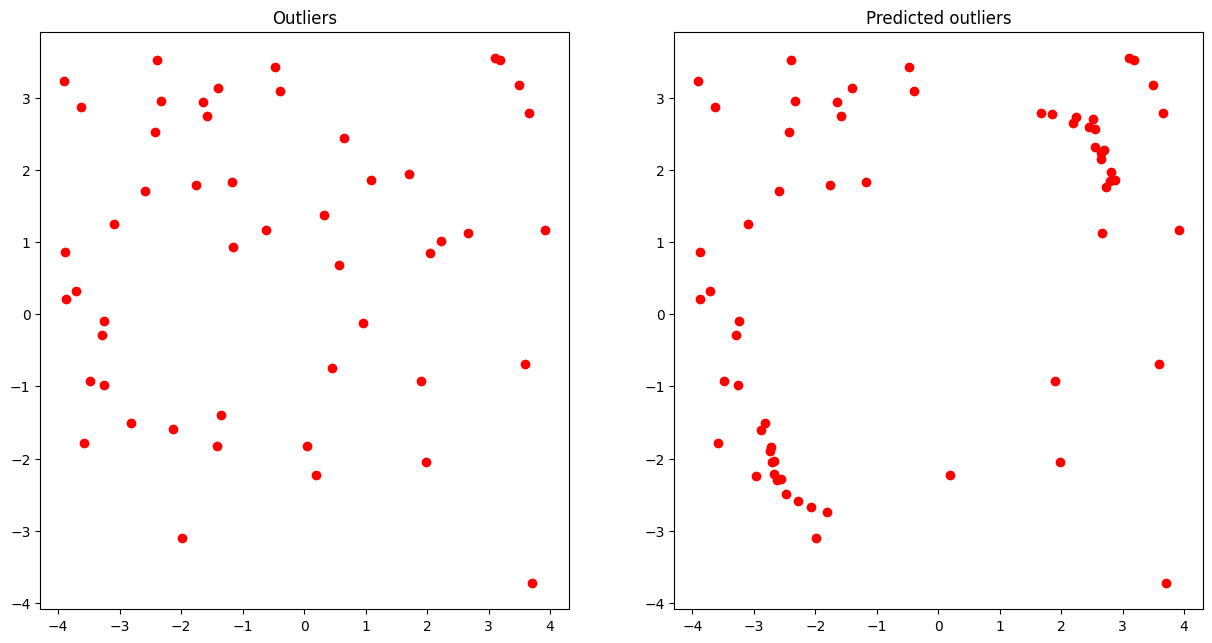

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7.5))

# Plot train set
ax1.set_title('Outliers')
ax1.scatter(X_test_outliers[:, 0], X_test_outliers[:, 1], color='red')

# Plot test set
ax2.set_title('Predicted outliers')
ax2.scatter(test_anom[:, 0], test_anom[:, 1], color='red')
plt.show()

In [ ]:
false_outliers = np.array([val for val in test_anom if val not in X_test_outliers and val in X_test_normal])
undetected_outliers = np.array([val for val in X_test_outliers if val not in test_anom])

correct_outliers = np.array([val for val in test_anom if val in X_test_outliers])

print('Anomalies in original dataset: {}'.format(X_test_outliers.shape[0]))
print('Predicted anomalies: {}'.format(test_anom.shape[0]))
print('Correct outlier detections: {}'.format(len(correct_outliers)))
print('False outlier detections: {}'.format(len(false_outliers)))
print('Undetected outliers: {}'.format(len(undetected_outliers)))

Anomalies in original dataset: 50
Predicted anomalies: 63
Correct outlier detections: 35
False outlier detections: 28
Undetected outliers: 15


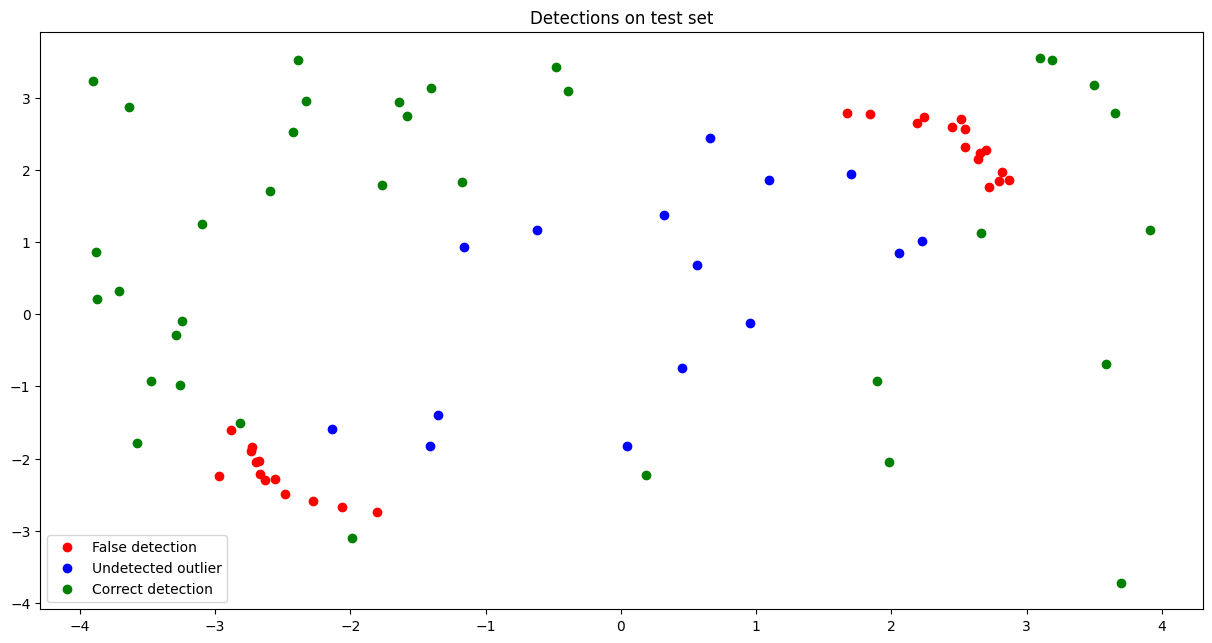

In [ ]:
plt.figure(figsize=(15, 7.5))
plt.title('Detections on test set')
plt.scatter(false_outliers[:, 0], false_outliers[:, 1], color='r')
plt.scatter(correct_outliers[:, 0], correct_outliers[:, 1], color='g')
plt.scatter(undetected_outliers[:, 0], undetected_outliers[:, 1], color='b')

legend_elements = [Line2D([], [], marker='o', color='r', label='False detection', linestyle='None'),
                   Line2D([], [], marker='o', color='b', label='Undetected outlier', linestyle='None'),
                   Line2D([], [], marker='o', color='g', label='Correct detection', linestyle='None')]
plt.legend(handles=legend_elements)
plt.show()

In [ ]:
metrics_gen(X_train_outliers, train_anom, correct_outliers, false_outliers, undetected_outliers)

Accuracy on test set: 70.00%
False detection ratio: 44.44%
Undetection ratio: 30.00%
